#Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [4]:
dataset = pd.read_csv('weatherAUS.csv')

In [5]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
dataset.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,10757.000000,10766.000000,10676.000000,4357.000000,2005.000000,10624.000000,10730.000000,10734.000000,10616.000000,10610.000000,10599.000000,10595.000000,5655.000000,5857.000000,10750.000000,10747.000000
mean,11.749642,24.091975,2.356641,5.628896,7.718404,35.244447,11.158155,15.601453,68.585625,47.294722,1018.214596,1015.565106,4.202653,4.335496,16.928670,22.683186
std,6.246996,6.976632,9.592674,4.741609,3.773698,12.585695,7.531044,7.760213,20.172628,21.003623,6.811869,6.698703,3.078956,2.852108,6.113098,6.757823
min,-3.000000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,5.000000,1.000000,989.800000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,6.700000,18.700000,0.000000,2.600000,5.100000,26.000000,6.000000,9.000000,55.000000,32.000000,1013.500000,1010.900000,1.000000,1.000000,12.300000,17.500000
50%,11.700000,23.600000,0.000000,4.400000,8.900000,33.000000,9.000000,15.000000,70.000000,46.000000,1018.200000,1015.500000,5.000000,5.000000,17.200000,22.100000
75%,16.800000,28.900000,0.400000,7.400000,10.600000,43.000000,17.000000,20.000000,84.000000,61.000000,1022.800000,1020.100000,7.000000,7.000000,21.300000,27.200000
max,29.700000,46.600000,371.000000,86.200000,13.800000,107.000000,48.000000,56.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,45.200000


In [7]:
#count all the null values in the data
dataset.isna().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8806
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       81
WindSpeed3pm       77
Humidity9am       195
Humidity3pm       201
Pressure9am       212
Pressure3pm       216
Cloud9am         5156
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

In [8]:
#it is clear that evaporation and sunshine have more missing values so better remove them 

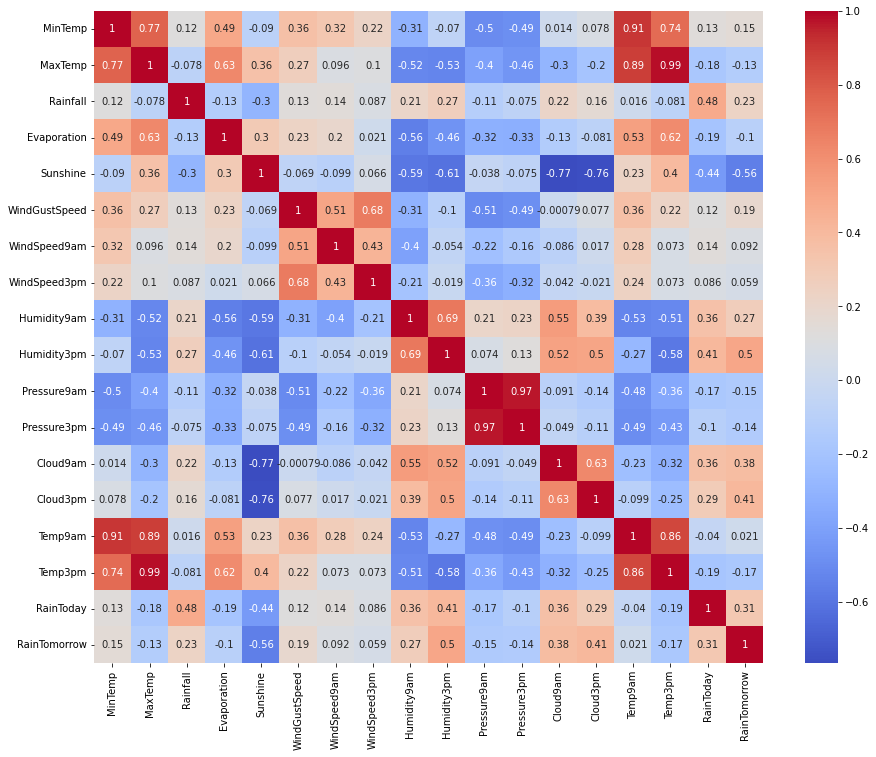

In [9]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(dataset.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

## **cleaning and preprocessing**

## Feature Selection

**bold text**

In [10]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [11]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['CoffsHarbour' 18.3 27.1 ... 24.8 25.9 0.0]
 ['CoffsHarbour' 17.8 28.1 ... 24.6 26.7 0.0]
 ['CoffsHarbour' 19.2 28.0 ... nan nan nan]]


In [12]:
print(Y)

[ 0.  0.  0. ...  0.  0. nan]


In [13]:
Y = Y.reshape(-1,1)


#Dealing with invalid Data

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [15]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['CoffsHarbour' 18.3 27.1 ... 24.8 25.9 0.0]
 ['CoffsHarbour' 17.8 28.1 ... 24.6 26.7 0.0]
 ['CoffsHarbour' 19.2 28.0 ... 20.6 18.4 0.0]]


In [16]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Encoding Dataset

In [17]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [18]:
print(X)

[[0 13.4 22.9 ... 16.9 21.8 0]
 [0 7.4 25.1 ... 17.2 24.3 0]
 [0 12.9 25.7 ... 21.0 23.2 0]
 ...
 [3 18.3 27.1 ... 24.8 25.9 0]
 [3 17.8 28.1 ... 24.6 26.7 0]
 [3 19.2 28.0 ... 20.6 18.4 0]]


In [19]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [20]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


#Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
print(X)

[[-1.25719422  0.26620921 -0.16798647 ... -0.00809357 -0.12717099
  -0.49345847]
 [-1.25719422 -0.69651634  0.14767515 ...  0.0410727   0.2434473
  -0.49345847]
 [-1.25719422  0.18598209  0.23376468 ...  0.66384551  0.08037525
  -0.49345847]
 ...
 [ 1.5969693   1.05243509  0.43464026 ...  1.28661831  0.480643
  -0.49345847]
 [ 1.5969693   0.97220796  0.57812282 ...  1.25384079  0.59924086
  -0.49345847]
 [ 1.5969693   1.19684392  0.56377456 ...  0.59829047 -0.63121187
  -0.49345847]]


In [23]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## MODELLING

#Splitting Dataset into Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)

In [25]:
print(X_train)

[[ 0.64558146 -0.84092517 -1.37323995 ... -1.10614035 -1.31314952
   2.02651298]
 [ 0.64558146  2.03120607  2.5581821  ...  2.85993907  2.80812586
  -0.49345847]
 [-1.25719422  1.61402499  1.02291874 ...  1.30300706  1.07363227
  -0.49345847]
 ...
 [-0.30580638  0.68339029 -0.11059345 ...  0.64745675 -0.43849036
   2.02651298]
 [-0.30580638 -1.64319647 -1.6458568  ... -1.41752675 -1.87648932
  -0.49345847]
 [-1.25719422  0.92407168  1.037267   ...  1.22106327  1.14775592
  -0.49345847]]


In [26]:
print(Y_train)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]


In [27]:
Y_test.shape


(2163, 1)

## MODELS

#Training Model

# **Random Forest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [29]:
classifier_rf.score(X_train,Y_train)

1.0

In [30]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [32]:
print(Y_test_rf)

[0. 0. 0. ... 0. 0. 0.]


In [33]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)

In [34]:
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [35]:
print(dataframe)

      Rain on Tommorrow  Predition of Rain
0                   0.0                0.0
1                   0.0                0.0
2                   0.0                0.0
3                   0.0                0.0
4                   0.0                0.0
...                 ...                ...
2158                0.0                0.0
2159                1.0                1.0
2160                0.0                0.0
2161                0.0                0.0
2162                0.0                0.0

[2163 rows x 2 columns]


Calculating Accuracy of random forest

In [36]:
from sklearn.metrics import accuracy_score
acc_rfs=accuracy_score(Y_test_rf,y_pred_rf)
acc_rfs

0.8811835413777162

In [37]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_rf,y_pred_rf)
print(cm)


[[1696   72]
 [ 185  210]]


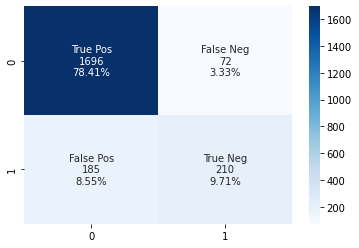

In [38]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues');

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1768
         1.0       0.74      0.53      0.62       395

    accuracy                           0.88      2163
   macro avg       0.82      0.75      0.77      2163
weighted avg       0.87      0.88      0.87      2163



# **Logisitic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression  
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [41]:
classifier_lr.score(X_train,Y_train)

0.8677150786308974

In [42]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print(y_pred_lr)

[0. 0. 0. ... 0. 0. 0.]


In [44]:
print(Y_test_lr)

[0. 0. 0. ... 0. 0. 0.]


In [45]:
y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)

In [46]:
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [47]:
print(dataframe)

      Rain on Tommorrow  Predition of Rain
0                   0.0                0.0
1                   0.0                0.0
2                   0.0                0.0
3                   0.0                0.0
4                   0.0                0.0
...                 ...                ...
2158                0.0                0.0
2159                1.0                1.0
2160                0.0                0.0
2161                0.0                0.0
2162                0.0                0.0

[2163 rows x 2 columns]


In [48]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(Y_test_lr,y_pred_lr)
acc_lr

0.8793342579750347

In [49]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lr=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm_lr)


[[1698   70]
 [ 191  204]]


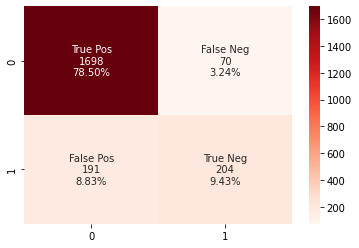

In [50]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds');

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1768
         1.0       0.74      0.52      0.61       395

    accuracy                           0.88      2163
   macro avg       0.82      0.74      0.77      2163
weighted avg       0.87      0.88      0.87      2163



# **DecisionTree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
classifier_dt.score(X_train,Y_train)

1.0

In [54]:
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print(y_pred_dt)

[0. 0. 0. ... 0. 0. 0.]


In [56]:
print(Y_test_dt)

[0. 0. 0. ... 0. 0. 0.]


In [57]:
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)

In [58]:
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [59]:
print(dataframe)

      Rain on Tommorrow  Predition of Rain
0                   0.0                0.0
1                   0.0                0.0
2                   0.0                0.0
3                   0.0                0.0
4                   0.0                0.0
...                 ...                ...
2158                0.0                0.0
2159                1.0                1.0
2160                0.0                0.0
2161                0.0                0.0
2162                0.0                0.0

[2163 rows x 2 columns]


In [60]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test_dt,y_pred_dt)
acc_dt

0.8257050392972723

In [61]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_dt=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm_dt)

[[1564  204]
 [ 173  222]]


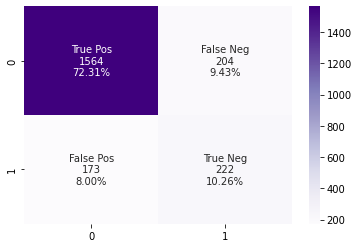

In [62]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Purples');

In [63]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1768
         1.0       0.52      0.56      0.54       395

    accuracy                           0.83      2163
   macro avg       0.71      0.72      0.72      2163
weighted avg       0.83      0.83      0.83      2163



# **Light Gbm**

In [64]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state =0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=0)

In [66]:
classifier_lgbm.score(X_train,Y_train)

0.9399861239592969

In [67]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print(y_pred_lgbm)

[0. 0. 0. ... 0. 0. 0.]


In [69]:
print(Y_test_lgbm)

[0. 0. 0. ... 0. 0. 0.]


In [70]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)

In [71]:
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [72]:
print(dataframe)

      Rain on Tommorrow  Predition of Rain
0                   0.0                0.0
1                   0.0                0.0
2                   0.0                0.0
3                   0.0                0.0
4                   0.0                0.0
...                 ...                ...
2158                0.0                0.0
2159                1.0                1.0
2160                0.0                0.0
2161                0.0                0.0
2162                0.0                0.0

[2163 rows x 2 columns]


In [73]:
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test_lgbm,y_pred_lgbm)
acc_lg

0.8830328247803976

In [74]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lg=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm_lg)

[[1680   88]
 [ 165  230]]


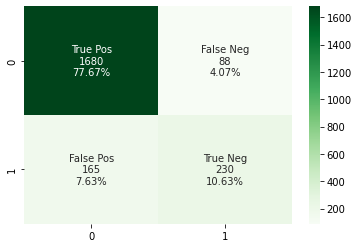

In [75]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lg.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      1768
         1.0       0.72      0.58      0.65       395

    accuracy                           0.88      2163
   macro avg       0.82      0.77      0.79      2163
weighted avg       0.88      0.88      0.88      2163



# **Xgboost**

In [77]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from xgboost import XGBRegressor
clf_xgb = XGBRegressor(random_state=0)
clf_xgb.fit(X_train,Y_train)

[07:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [79]:
clf_xgb.score(X_train,Y_train)

0.4642120496366705

In [80]:
y_pred_xgb = le6.inverse_transform(np.array(clf_xgb.predict(X_test),dtype=int))
Y_test_xgb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
print(y_pred_xgb)

[0. 0. 0. ... 0. 0. 0.]


In [82]:
print(Y_test_xgb)

[0. 0. 0. ... 0. 0. 0.]


In [83]:
y_pred_xgb = y_pred_xgb.reshape(-1,1)
Y_test_xgb = Y_test_xgb.reshape(-1,1)

In [84]:
df = np.concatenate((Y_test_xgb,y_pred_xgb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [85]:
print(dataframe)

      Rain on Tommorrow  Predition of Rain
0                   0.0                0.0
1                   0.0                0.0
2                   0.0                0.0
3                   0.0                0.0
4                   0.0                0.0
...                 ...                ...
2158                0.0                0.0
2159                1.0                0.0
2160                0.0                0.0
2161                0.0                0.0
2162                0.0                0.0

[2163 rows x 2 columns]


In [86]:
from sklearn.metrics import accuracy_score
acc_xgb=accuracy_score(Y_test_xgb,y_pred_xgb)
acc_xgb

0.8257050392972723

In [87]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_xgb=confusion_matrix(Y_test_xgb,y_pred_xgb)
print(cm_xgb)

[[1768    0]
 [ 377   18]]


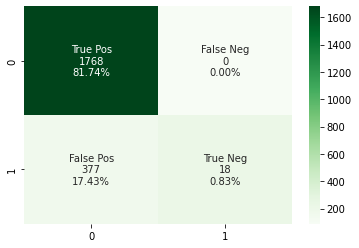

In [88]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_xgb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [89]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_xgb,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      1768
         1.0       1.00      0.05      0.09       395

    accuracy                           0.83      2163
   macro avg       0.91      0.52      0.50      2163
weighted avg       0.86      0.83      0.75      2163



## Accuracy Comparison

In [91]:
accuracy_dict = {"Logistic Regression": acc_lr,
                 "Random Forest": acc_rfs,
                 "Decision Trees": acc_dt,
                 "LightGBM": acc_lg,
                 "Xgboost": acc_xgb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.879334
Random Forest,0.881184
Decision Trees,0.825705
LightGBM,0.883033
Xgboost,0.825705


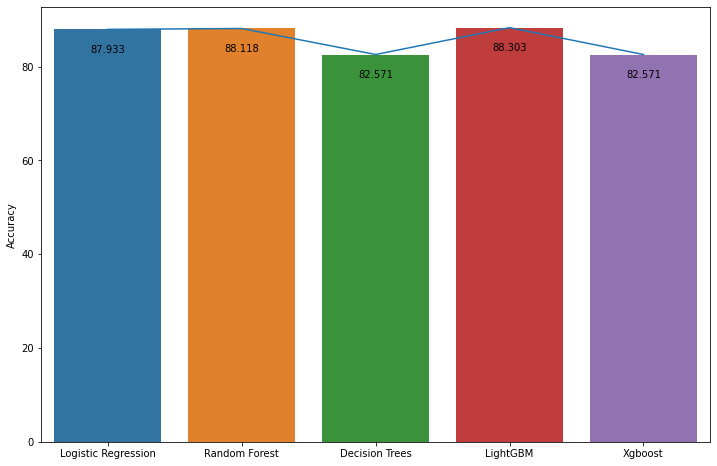

In [92]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

In [93]:
import pickle

In [94]:
filename = 'trained_model.sav'
pickle.dump(classifier_rf,open(filename,'wb'))

In [95]:
loaded_model=pickle.load(open('trained_model.sav','rb'))